# Personal Loan data
* Data from: [Personal Loan](https://www.kaggle.com/itsmesunil/bank-loan-modelling)  
Personal Loan 데이터는 고객을 더 늘리고자 하는 가상의 은행 데이터이다.  
이 회사의 경영진은 부채를 가진 고객을 개인 대출 고객으로 전환하는 방법을 모색하려고 한다.


- 금융 회사에서 흔히 볼 수 있는 기본적인 데이터이며, 목적을 가진 데이터
- 간단한 로지스틱 회귀 분석을 통해 모델링을 해보고, 결과를 분석

## 1.데이터 둘러보기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus = False)

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
bank = pd.read_csv("./dataset/Personal Loan.csv")
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<컬럼 설명>

* ID: 고객 번호
* Age: 나이
* Experience:   
* Income: 연간 수입(000)  
* Zipcode: 우편번호  
* Family: 가족 구성원 수
* CCAvg: 신용카드 월평균 이용 금액(000)  
* Education: 학력(1: Undergrad, 2: Graduate, 3: Advanced/Professional)
* Mortgage: 주택 담보 대출 금액(000)
* Personal Loan: 지난번 영업에서 고객이 개인대출을 받았는가?(0: N, 1: Y)  
* Securities Account: 보험 유무(0: N, 1: Y)  
* CD Account:양도성 예금증서 보유 유무(0: N, 1: Y)  
* Online: 온라인 뱅킹 유무(0: N, 1: Y)
* Credit Card: 신용카드 보유 유무(0: N, 1: Y)


* 범주형 변수: *빈도frequency 계산 가능*
               ID, zipcode, educaiont, personal loan, securities account, cd account, online, credit card
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               age, experience, income, family, ccavg, mortgage

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [6]:
print('Education ', bank['Education'].unique())
print('Personal Loan ', bank['Personal Loan'].unique())
print('Securities Account ', bank['Securities Account'].unique())
print('CD Account ', bank['CD Account'].unique())
print('Online ', bank['Online'].unique())
print('CreditCard ', bank['CreditCard'].unique())

Education  [1 2 3]
Personal Loan  [0 1]
Securities Account  [1 0]
CD Account  [0 1]
Online  [0 1]
CreditCard  [0 1]


In [7]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2500.0,1250.500000,721.832160,1.0,625.75,1250.5,1875.25,2500.0
Age,2500.0,45.346000,11.519521,23.0,35.00,45.0,55.00,67.0
Experience,2500.0,20.120800,11.523824,-2.0,10.00,20.0,30.00,42.0
Income,2500.0,74.447200,46.672400,8.0,39.00,64.0,99.25,205.0
ZIP Code,2500.0,93135.691600,2420.763339,9307.0,92007.00,93407.0,94609.00,96651.0
Family,2500.0,2.408000,1.159860,1.0,1.00,2.0,4.00,4.0
CCAvg,2500.0,1.951284,1.795449,0.0,0.70,1.5,2.50,10.0
Education,2500.0,1.865600,0.836550,1.0,1.00,2.0,3.00,3.0
Mortgage,2500.0,57.388400,100.816403,0.0,0.00,0.0,104.00,617.0
Personal Loan,2500.0,0.102400,0.303234,0.0,0.00,0.0,0.00,1.0


In [8]:
print("총 데이터 수 : ",bank.shape[0] * bank.shape[1])
print("고객 나이는 {}세부터 {}세까지 있으며, 평균 나이는 {:.1f}세이다".format(bank['Age'].min(),bank['Age'].max(),bank['Age'].mean()))

총 데이터 수 :  35000
고객 나이는 23세부터 67세까지 있으며, 평균 나이는 45.3세이다


## 3.데이터 정비하기

### 3-1. 컬럼명 바꾸기

In [9]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
bank.columns = ['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg','edu', 'mort',
                'loan', 'secu','cd', 'online', 'cc']
bank.columns

Index(['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg', 'edu', 'mort',
       'loan', 'secu', 'cd', 'online', 'cc'],
      dtype='object')

### 3-2. 필요없는 컬럼 제거

In [11]:
bank.drop(columns=['id','zip'],inplace=True)

In [12]:
bank.head()

,age,exp,income,fam,ccavg,edu,mort,loan,secu,cd,online,cc
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## 2.질문하기

* 수입/월평균신용카드사용량/가족인원수와 대출 사이의 관계는?
* 월 평균 사용 금액을 구간화 해서 특징을 볼 수 있을까?
* 로지스틱 회귀 분석을 사용해서 신규 고객의 대출여부를 예측하는 모델 만들기


## 4.EDA & Visualization

### 4-1. 간단한 분석

In [19]:
# 수입과 대출 사이의 관계

df1 = bank.groupby('loan')['income'].agg(['mean','count'])
df1.rename(columns={'mean':'Income Mean', 'count':'Number of People'})

,Income Mean,Number of People
loan,,
0,66.295009,2244
1,145.906250,256


- 대출을 받은 사람들이 수입이 훨씬 많음

In [20]:
# 월평균신용카드사용량과 대출

df2 = bank.groupby('loan')['ccavg'].agg(['mean','count'])
df2.rename(columns={'mean':'Ccavg Mean', 'count':'Number of People'})

,Ccavg Mean,Number of People
loan,,
0,1.722763,2244
1,3.954414,256


- 대출을 받은 사람들이 월 평균 신용카드 사용액이 훨씬 많음

In [21]:
# 가족인원수와 대출

df3 = bank.groupby('fam')['loan'].agg(['mean','count'])
df3.rename(columns={'mean':'Person Loan Mean', 'count':'Number of People'})

,Person Loan Mean,Number of People
fam,,
1,0.083445,743
2,0.082540,630
3,0.136456,491
4,0.117925,636


### 변수의 분포 확인하기

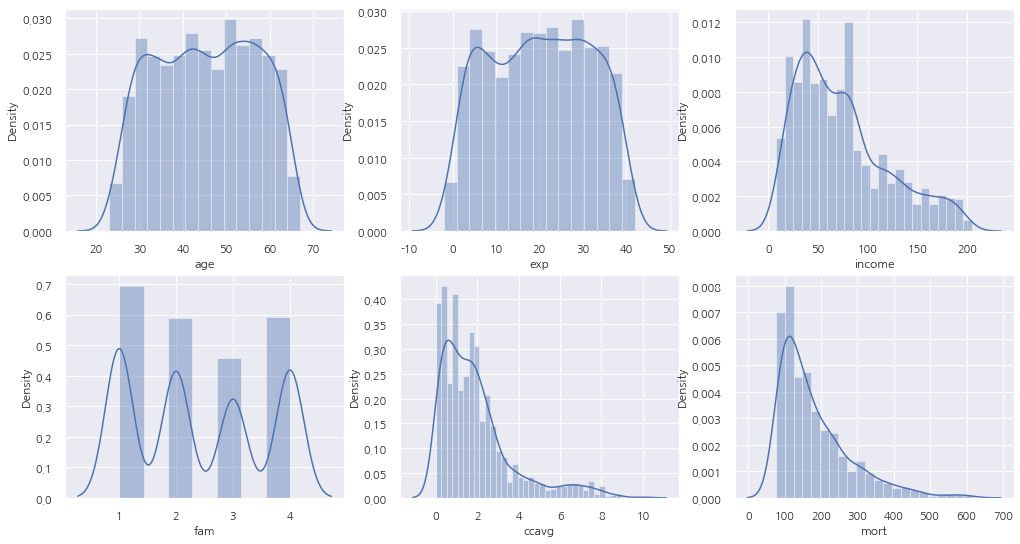

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(17,9))

sns.distplot(bank['age'], ax=ax[0,0])
sns.distplot(bank['exp'], ax=ax[0,1])
sns.distplot(bank['income'], ax=ax[0,2])
sns.distplot(bank['fam'], ax=ax[1,0])
sns.distplot(bank['ccavg'], ax=ax[1,1])
# sns.distplot(bank['mort'], ax=ax[1,2])
sns.distplot(bank['mort'][bank['mort']!=0], ax=ax[1,2])

plt.show()

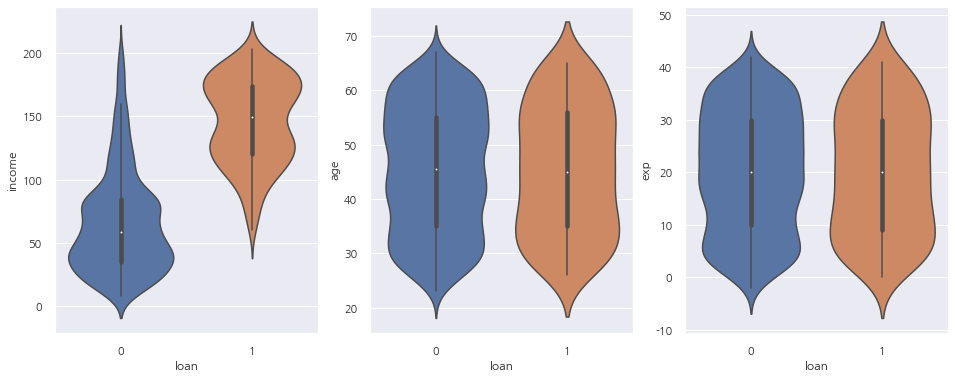

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(16,6))

sns.violinplot(bank['loan'], bank['income'], ax=ax[0])
sns.violinplot(bank['loan'], bank['age'], ax=ax[1])
sns.violinplot(bank['loan'], bank['exp'], ax=ax[2])

plt.show()

### 변수 간 상관관계 파악하기

<AxesSubplot:>

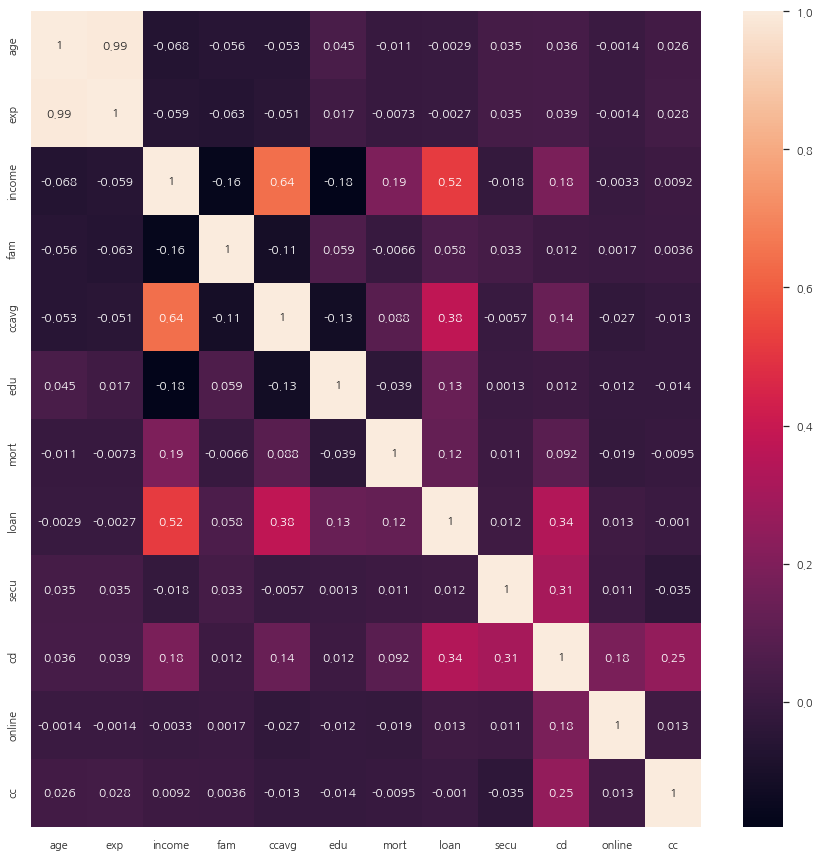

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

sns.heatmap(bank.corr(), ax=ax, annot=True, fmt='.2g')

### 구간화 해서 그래프 그리기

In [27]:
df4 = bank[['ccavg','cc','loan']].copy()

In [28]:
df4['ccavg_bin'] = pd.cut(df4['ccavg'], bins=[0,2,4,6,100], labels=['0-2','3-4','5-6','7+'])

In [29]:
df4

,ccavg,cc,loan,ccavg_bin
0,1.6,0,0,0-2
1,1.5,0,0,0-2
2,1.0,0,0,0-2
3,2.7,0,0,3-4
4,1.0,1,0,0-2
...,...,...,...,...
2495,1.9,1,0,0-2
2496,0.7,0,0,0-2
2497,0.9,0,0,0-2
2498,6.1,0,0,7+


In [30]:
# 구간별 신용카드 유무, 신용카드 월평균 사용액 집계

df5 = df4.groupby(['ccavg_bin','cc'])['ccavg'].sum().reset_index()
df5

,ccavg_bin,cc,ccavg
0,0-2,0,1110.10
1,0-2,1,466.38
2,3-4,0,1187.79
3,3-4,1,430.33
4,5-6,0,502.11
5,5-6,1,181.28
6,7+,0,688.96
7,7+,1,311.26


<AxesSubplot:xlabel='income', ylabel='ccavg'>

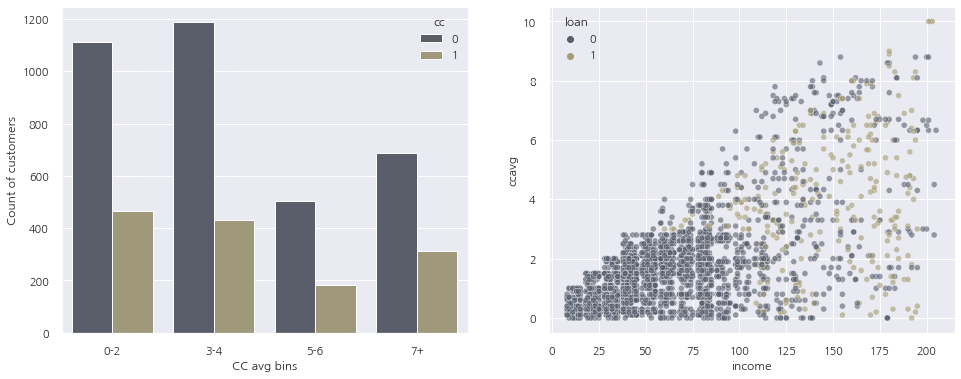

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

sns.barplot(df5['ccavg_bin'], df5['ccavg'], hue=df5['cc'], palette='cividis', ax=ax[0])
ax[0].set(xlabel='CC avg bins', ylabel = 'Count of customers')

sns.scatterplot(x='income', y='ccavg', data=bank, ax=ax[1], hue='loan', palette='cividis', alpha=0.6)

## 로지스틱 회귀분석  
로지스틱 회귀분석(Logistic regression):  
종속변수와 독립변수 사이의 관계를 함수로 나타내어, 이 다음을 예측하는 방식.  
독립변수 사이의 선형 결합으로 종속변수를 설명하는 것은 선형 회귀와 동일하지만, **종속변수가 범주형 데이터를 대상**으로 한다는 점이 다르다.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [34]:
bank.columns

Index(['age', 'exp', 'income', 'fam', 'ccavg', 'edu', 'mort', 'loan', 'secu',
       'cd', 'online', 'cc'],
      dtype='object')

In [35]:
feature_columns = list(bank.columns.difference(['loan']))

In [38]:
X = bank[feature_columns]
X

,age,cc,ccavg,cd,edu,exp,fam,income,mort,online,secu
0,25,0,1.6,0,1,1,4,49,0,0,1
1,45,0,1.5,0,1,19,3,34,0,0,1
2,39,0,1.0,0,1,15,1,11,0,0,0
3,35,0,2.7,0,2,9,1,100,0,0,0
4,35,1,1.0,0,2,8,4,45,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,46,1,1.9,0,1,22,4,70,212,0,0
2496,63,0,0.7,0,2,37,3,32,141,0,0
2497,33,0,0.9,0,3,9,3,14,114,0,0
2498,38,0,6.1,0,1,14,2,111,326,0,0


In [40]:
y = bank['loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Name: loan, Length: 2500, dtype: int64

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1750, 11), (750, 11), (1750,), (750,))

### 컬럼의 값이 정규분포를 가지도록

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_train

array([[-1.38483647, -0.64575851,  1.33209995, ..., -0.56434536,
        -1.19888528, -0.35309866],
       [-0.60822353, -0.64575851, -0.67992335, ..., -0.56434536,
         0.83410817, -0.35309866],
       [-0.26306222, -0.64575851,  0.88498366, ..., -0.56434536,
        -1.19888528, -0.35309866],
       ...,
       [ 1.117583  , -0.64575851,  0.54964644, ..., -0.56434536,
        -1.19888528, -0.35309866],
       [-0.95338484,  1.54856652, -1.01526057, ...,  2.01242368,
         0.83410817, -0.35309866],
       [ 1.03129267, -0.64575851, -0.67992335, ...,  0.88947374,
        -1.19888528, -0.35309866]])

### 모델 만들기

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
lr.coef_

array([[ 0.14046623, -0.53354576,  0.212015  ,  0.89084894,  1.14851236,
        -0.03435181,  0.68363224,  2.18179988, -0.0348634 , -0.10476571,
        -0.34927149]])

In [48]:
lr.intercept_

array([-4.20640336])

In [49]:
y_pred1 = lr.predict(X_train)
print("학습데이터 정확도 : {:.4f}".format(accuracy_score(y_train,y_pred1)))

학습데이터 정확도 : 0.9491


In [50]:
y_pred2 = lr.predict(X_test)
print("테스트 데이터 정확도 : {:.4f}".format(accuracy_score(y_test,y_pred2)))

테스트 데이터 정확도 : 0.9573


#### Confusion Matrix(혼동행렬) - 모델 평가

In [52]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[662,   3],
       [ 29,  56]], dtype=int64)

In [53]:
cm_df = pd.DataFrame(cm, index=[i for i in ['1','0']], columns=[i for i in ['predict 1','predict 0']])
cm_df

,predict 1,predict 0
1,662,3
0,29,56


<AxesSubplot:>

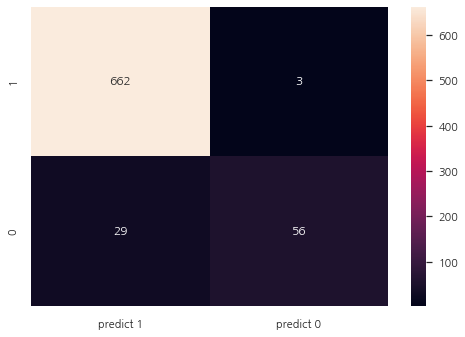

In [55]:
sns.heatmap(cm_df, annot=True,fmt='g')

In [57]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred2, labels=[1,0]))

              precision    recall  f1-score   support

           1       0.95      0.66      0.78        85
           0       0.96      1.00      0.98       665

    accuracy                           0.96       750
   macro avg       0.95      0.83      0.88       750
weighted avg       0.96      0.96      0.95       750

